In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("Flu_Classification.csv")
df.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,67.0,38.11,F,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
1,29.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,22.0,0.00,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
3,20.0,36.56,F,unknown,Yes,Yes,unknown,No,unknown,Yes,unknown,H1N1
4,21.0,0.00,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1


In [3]:
df.shape

(1485, 12)

In [4]:
# Converting string categorical variables into numeric categorical variables

def convert(df, n, k) :
    for col in df.iloc[:,n:k].columns:
        df[col] = df[col].astype('category').cat.codes
        
    return df

In [5]:
df = convert(df, 2,12)
df_cluster = df.iloc[:,0:11]
df_cluster.head()

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer
0,67.0,38.11,0,2,1,1,2,0,2,0,1
1,29.0,0.00,1,2,2,2,2,2,2,2,1
2,22.0,0.00,0,2,2,2,2,2,2,2,1
3,20.0,36.56,0,2,1,1,2,0,2,1,1
4,21.0,0.00,1,2,2,2,2,2,2,2,1


In [6]:
df_cluster.shape

(1485, 11)

In [7]:
# Scaling the Data
def datapreprocessing(df):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_normalized = normalize(df_scaled)
    df_normalized = pd.DataFrame(df_normalized)
    pca = PCA(n_components = 2)
    df_principal = pca.fit_transform(df_normalized)
    df_principal = pd.DataFrame(df_principal)
    df_principal.columns = ['P1', 'P2']
    return df_principal

In [8]:
df_cluster1 = datapreprocessing(df_cluster)

In [9]:
df_cluster1.shape

(1485, 2)

In [10]:
# Building the affinity model
def spectral(n,a,df):
    spectral_model_nn = SpectralClustering(n_clusters = n, affinity = a)
    labels_nn = spectral_model_nn.fit_predict(df)
    return labels_nn

In [11]:
labels_nn = spectral(2,"nearest_neighbors",df_cluster1)

C:\Users\eveli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [12]:
# Building the label to colour mapping
def visualization(df1,df2):
    colours = {}
    colours[0] = 'b'
    colours[1] = 'y'
  
    cvec = [colours[label] for label in df1]
    b = plt.scatter(df2['P1'], df2['P2'], color ='b');
    y = plt.scatter(df2['P1'], df2['P2'], color ='y');
  
    plt.figure(figsize =(9, 9))
    plt.scatter(df2['P1'], df2['P2'], c = cvec)
    plt.legend((b, y), ('Label 0', 'Label 1'))
    plot = plt.show()
    return plot

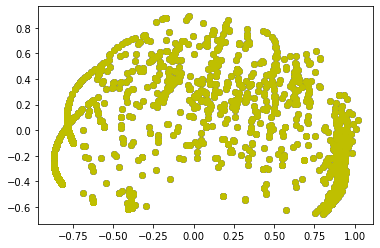

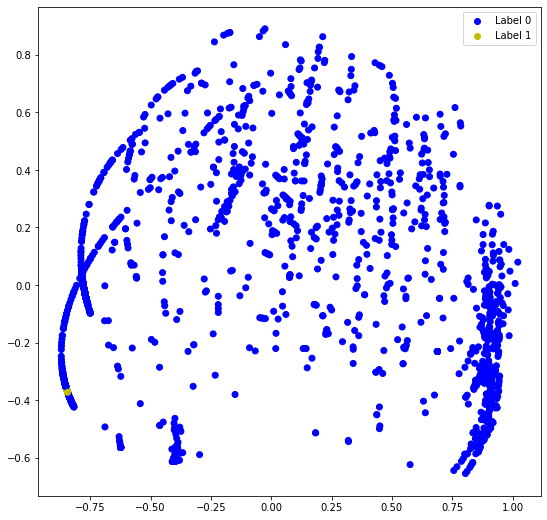

In [13]:
visualization(labels_nn,df_cluster1)